In [16]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
SAVE_PATH='/mnt/data/kiwi_mlweekend_dataset.dump'
%matplotlib inline

### Load Dataset

In [2]:
with open(SAVE_PATH, 'rb') as f:
    data=pickle.load(f)

In [3]:
data=[item for item in data if item[1]]

In [4]:
data_dict=dict()
for feature, fn_val in data:
    if feature in data_dict:
        data_dict[feature].append(fn_val)
    else:
        data_dict[feature]=[fn_val]

In [5]:
def rmse(y_true,y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

def apply(fn, data_dict):
    res=list()
    for feature in data_dict:
        res.append((feature, fn(data_dict[feature])))
    return res

def plot(x,y,y_pred=None,scatter=True,figsize=(5,5), title=None):
    plt.figure(figsize=figsize)
    if scatter:
        plt.scatter(x, y,  color='black')
    plt.plot(x, y, color='blue', linewidth=2)
    if y_pred is not None:
        plt.plot(x, y_pred, color='red', linewidth=1)
    if title is not None:
        plt.title(title)
    plt.show()

def tupls_to_xy(tupls):
    x,y=zip(*sorted(tupls, key=lambda x: x[0]))
    x=np.array(x).reshape(-1,1)
    y=np.array(y)
    return x,y

def get_model_formula(model):
    feat_names=model.get_params()['polynomialfeatures'].get_feature_names()
    coefs=[np.round(coef) for coef in model.get_params()['ridge'].coef_]
    return [(feat_name.replace('x0','x'), coef) for (feat_name,coef) in list(zip(feat_names,coefs)) if coef!=0]


def formula_to_str(formula_tupls):
    return 'y = '+'+'.join([str(coef)+'*'+feat_name for (feat_name,coef) in reversed(formula_tupls)]).replace('+-','-')

In [6]:
means=apply(np.mean,data_dict)

In [7]:
x,y_mean=tupls_to_xy(means)

#### Function to predict

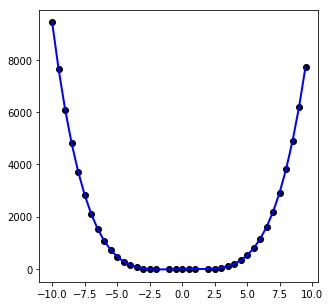

In [8]:
plot(x,y_mean)

### Model training

In [9]:
fn_model = make_pipeline(PolynomialFeatures(10), Ridge())

In [10]:
fn_model.fit(x,y_mean)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [11]:
y_pred_train=fn_model.predict(x)

#### Training error


In [12]:
rmse(y_mean,y_pred_train)

0.2594824959554186

Training data fit

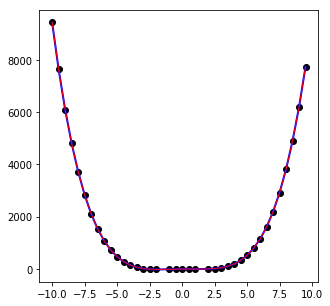

In [13]:
plot(x,y_mean,y_pred=y_pred_train)

### Secret formula

In [14]:
viz_x=np.array(range(-10,11,1)).reshape(-1,1)
viz_y=fn_model.predict(viz_x)

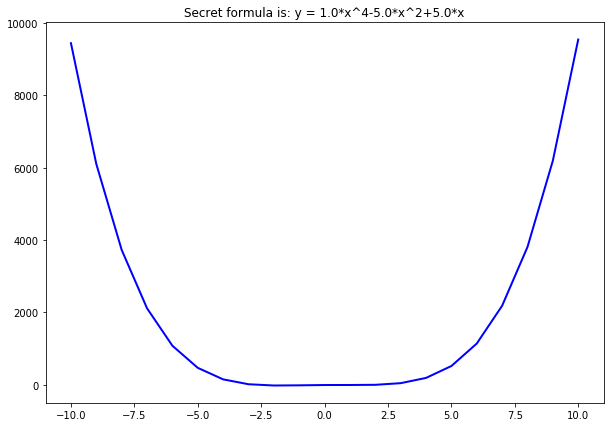

In [15]:
res_str='Secret formula is: '+formula_to_str(get_model_formula(fn_model))
plot(viz_x,viz_y,figsize=(10,7),scatter=False,title=res_str)